In [1]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure
import cv2
%matplotlib inline

In [2]:
image = cv2.imread('contrast2.jpeg', 0)
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualise = True)

print(fd.shape)

(3456,)


/usr/local/lib/python3.4/dist-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)
/usr/local/lib/python3.4/dist-packages/skimage/feature/_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


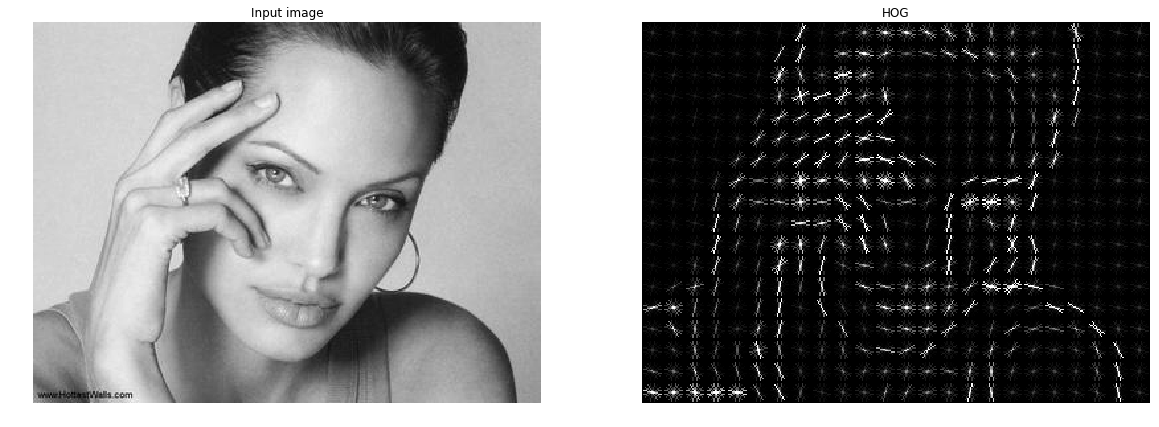

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,15), sharey=True)
ax1.axis('off')
ax1.imshow(image,cmap='gray')
ax1.set_title('Input image')

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0,10)) # Visualizar mejor la informacion de los gradientes

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap='gray')
ax2.set_title('HOG')

plt.show()

/usr/local/lib/python3.4/dist-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)
/usr/local/lib/python3.4/dist-packages/skimage/feature/_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


(864,)


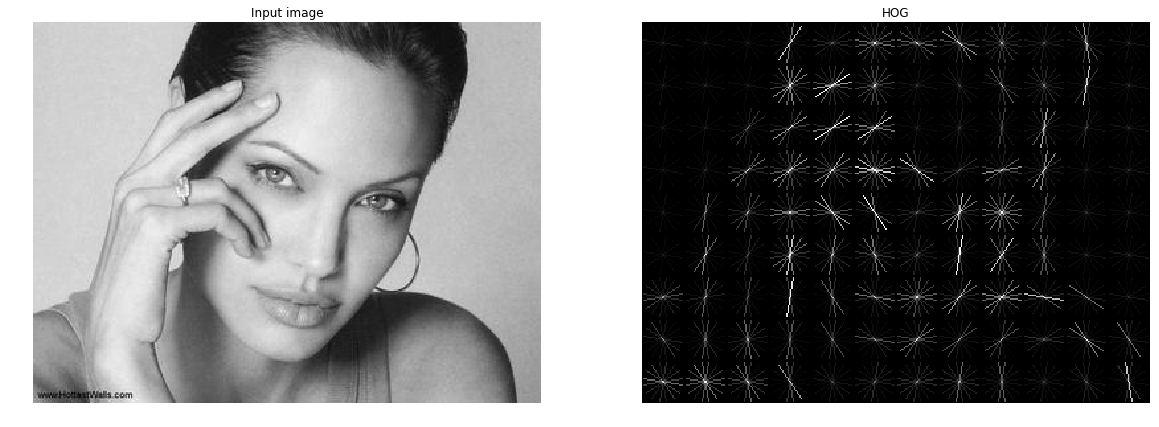

In [10]:
image = cv2.imread('contrast2.jpeg', 0)
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(32, 32), cells_per_block=(1, 1), visualise = True)

print(fd.shape)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,15), sharey=True)
ax1.axis('off')
ax1.imshow(image,cmap='gray')
ax1.set_title('Input image')

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0,10)) # Visualizar mejor la informacion de los gradientes

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap='gray')
ax2.set_title('HOG')

plt.show()

/usr/local/lib/python3.4/dist-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)
/usr/local/lib/python3.4/dist-packages/skimage/feature/_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


(128,)


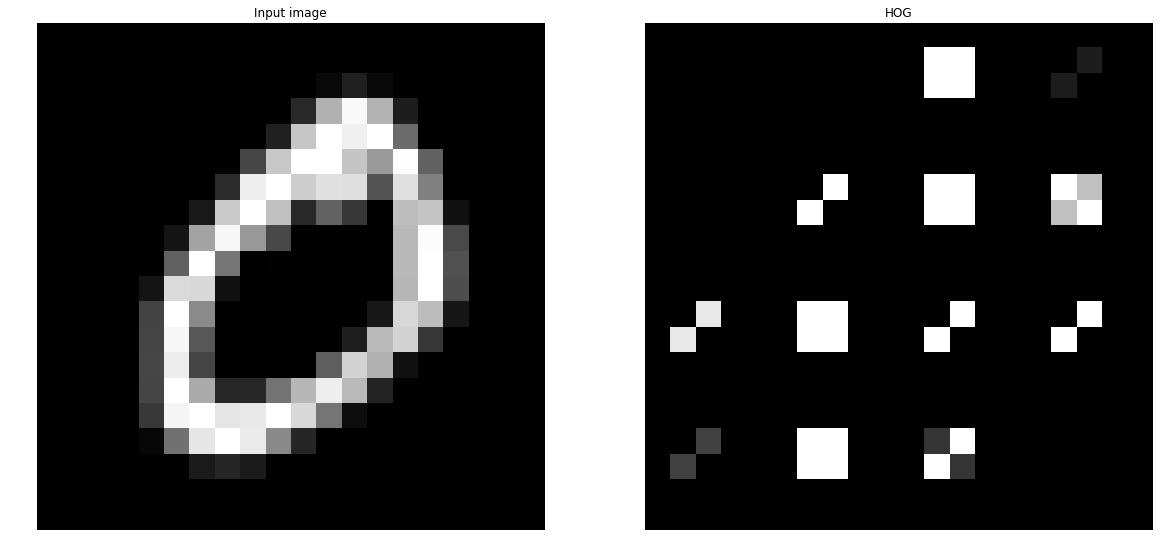

In [27]:
r=1
c=1
image = cv2.imread('digits.png', 0)
fd, hog_image = hog(image[:20 * r,:20 * c], orientations=8, pixels_per_cell=(5, 5), cells_per_block=(1, 1), visualise = True)

print(fd.shape)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,20), sharey=True)
ax1.axis('off')
ax1.imshow(image[:20 * r,:20 * c],cmap='gray')
ax1.set_title('Input image')

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0,10)) # Visualizar mejor la informacion de los gradientes

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap='gray')
ax2.set_title('HOG')

plt.show()

In [28]:
import numpy as np

In [41]:
# Construir el reconocedor de digitos
image=cv2.imread('digits.png',0)

D=[] # Datos (Descriptores)
L=[] # Etiquetas
# Construir dataset de entrenamiento
for i in range(0,80): # Columnas
    for j in range(0,50): # Filas
        auxIm = image[j*20:(j+1)*20,i*20:(i+1)*20]
        fd=hog(auxIm,orientations=8,pixels_per_cell=(2,2),cells_per_block=(1,1))
        D.append(fd)
        L.append(j//5)

T=[] # lo mismo pero para los que no son de  entrenamiento (T-EST)
LT=[] #

for i in range(80,100): # Columnas
    for j in range(0,50): # Filas
        auxIm = image[j*20:(j+1)*20,i*20:(i+1)*20]
        fd=hog(auxIm,orientations=8,pixels_per_cell=(2,2),cells_per_block=(1,1))
        T.append(fd)
        LT.append(j//5)
        
D = np.vstack(D) # Convierte un arerglo en una matrix
L = np.vstack(L)

T = np.vstack(T)
LT = np.vstack(LT)

D = np.float32(D)
T = np.float32(T)

print(D.shape)
print(L.shape)

/usr/local/lib/python3.4/dist-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


(4000, 800)
(4000, 1)


In [42]:
# Creamos maquina de aprendizaje (la de opencv, no la de scikit)
svm= cv2.ml.SVM_create()
svm.setKernel(cv2.ml.SVM_LINEAR)
svm.setType(cv2.ml.SVM_C_SVC)
svm.setC(2.67) 
svm.setGamma(5.383) 

svm.train(D, cv2.ml.ROW_SAMPLE, L) # data, como la tomas (por filas), y las etiquetas

result = svm.predict(T)[1] # SVM devuelve los coeficientes de probabilidad [0] y la salida [1]
# Esto me esta devolviendo las etiquetas
mask = result == LT
correct = np.count_nonzero(mask)
print(correct*100/result.size)

96.2


In [44]:
print(result)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [6.]
 [6.]
 [6.]
 [6.]
 [6.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [8.]
 [8.]
 [8.]
 [8.]
 [8.]
 [9.]
 [9.]
 [9.]
 [9.]
 [9.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [1.]
 [6.]
 [6.]
 [6.]
 [6.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [8.]
 [8.]
 [8.]
 [8.]
 [8.]
 [9.]
 [9.]
 [9.]
 [9.]
 [9.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [6.]
 [6.]
 [6.]
 [0.]
 [6.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [8.]
 [8.]
 [8.]
 [8.]
 [8.]
 [1.]
 [9.]
 [9.]
 [9.]
 [9.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [3.]
 [3.

# Clasificador para placas de autos

* El dataset de entrenamiento nos lo da el profe (las letras y el numero)

* Dada la placa, ubicar los numeros, extraerlos

* Dada la imagen, con los filtros, fourier o demas seamos capaces de identificar los elementos y extraerlos